In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# tips
1. 컬럼의 이름 변경 -> [총 금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총 금액, 팁 소수점 첫째자리는 유지, 나머지는 반올림하여 올려준다.
3. 식사 인원, 성별 팁의 비율의 평균의 값을 구하고 시각화 (바 그래프)

In [3]:
tips.columns = ['총 금액','팁','성별','흡연여부','요일','시간','인원']

In [4]:
tips.head(2)

,총 금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [8]:
tips = tips.round({'총 금액':1, '팁':1}) # tips[['총 금액','팁']] = tips[['총 금액','팁']].round(1)

In [10]:
tips.head(3)

,총 금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3


In [24]:
# 팁 비율 = 팁 / (총금액 - 팁) * 100

tips['팁 비율'] = (tips['팁'] / (tips['총 금액'] - tips['팁'])) * 100

In [25]:
tips.head(2)

,총 금액,팁,성별,흡연여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,6.250000
1,10.3,1.7,Male,No,Sun,Dinner,3,19.767442


In [29]:
tip_ratio = tips.groupby(['인원', '성별']).mean()['팁 비율']

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_32200\2614013934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tip_ratio = tips.groupby(['인원', '성별']).mean()['팁 비율']


In [14]:
import matplotlib.pyplot as plt

In [30]:
tip_ratio

인원  성별    
1   Male      28.358209
    Female    28.478276
2   Male      21.454980
    Female    21.164299
3   Male      17.613898
    Female    19.442844
4   Male      18.034672
    Female    15.344779
5   Male      16.145399
    Female    20.647773
6   Male      17.924718
    Female    19.566761
Name: 팁 비율, dtype: float64

In [32]:
tip_ratio.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [35]:
list(range(0, len(tip_ratio.index), 1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

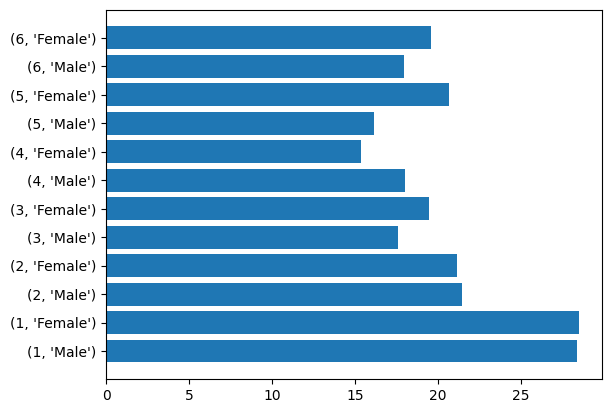

In [38]:
x = list(range(0, len(tip_ratio.index), 1))
y = tip_ratio

plt.barh(x,y)
plt.yticks(x, tip_ratio.index)
plt.show()

In [39]:
tip_ratio.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [40]:
group_data = tips.groupby(['인원','성별']).mean()[['팁 비율']]

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_32200\446978706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원','성별']).mean()[['팁 비율']]


In [41]:
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index:
    if i[1] == 'Male':
        data = group_data.loc[[i]]
        male_data = pd.concat([male_data, data])
    else:
        data = group_data.loc[[i]]
        female_data = pd.concat([female_data, data])

In [44]:
male_data

,,팁 비율
인원,성별,
1,Male,28.358209
2,Male,21.454980
3,Male,17.613898
4,Male,18.034672
5,Male,16.145399
6,Male,17.924718


In [53]:
x = list(range(len(male_data)))
x2 = list(1, range(len(male_data)+1, 1))
y1 = male_data['팁 비율']
y2 = female_data['팁 비율']

plt.bar(x, y1, width=0.3)
plt.bar(x, y2, width=0.3)
plt.show()

TypeError: list expected at most 1 argument, got 2

In [55]:
titanic = sns.load_dataset('titanic')[['age', 'sex', 'class','fare', 'survived']]
titanic.head(1)

,age,sex,class,fare,survived
0,22.0,male,Third,7.25,0


# pivot_table
1. 그룹화 
2. 행 인덱스
3. 열 인덱스
4. 데이터 값
5. 데이터의 집계

In [60]:
pv1 = pd.pivot_table(titanic, #기준이 되는 데이터프레임, 
                    index = 'class', #등급별로 그룹화
                    columns= 'sex',  #성별로 분할
                    values = 'age',  #그룹화된 데이터들의 나이를 선택
                    aggfunc= 'mean') #나이의 평균

pv1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [62]:
# 등급별, 성별로 생존자의 수
pv2 = pd.pivot_table(titanic, index= 'class', columns='sex',values='survived', aggfunc=sum)
pv2

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


In [66]:
# 자리등급과 성별에 (index) 따라서 생존자와 사망자의 (columns) 나이의 평균
pv3 = pd.pivot_table(titanic, index=['class','sex'], columns='survived', values='age', aggfunc=['sum','mean'])
pv3

sum                mean           
survived            0        1          0          1
class  sex                                          
First  female    77.0  2865.00  25.666667  34.939024
       male    2719.5  1449.92  44.581967  36.248000
Second female   216.0  1909.50  36.000000  28.080882
       male    2803.0   240.33  33.369048  16.022000
Third  female  1310.0   908.50  23.818182  19.329787
       male    5860.0   846.42  27.255814  22.274211

<AxesSubplot: ylabel='class,sex'>

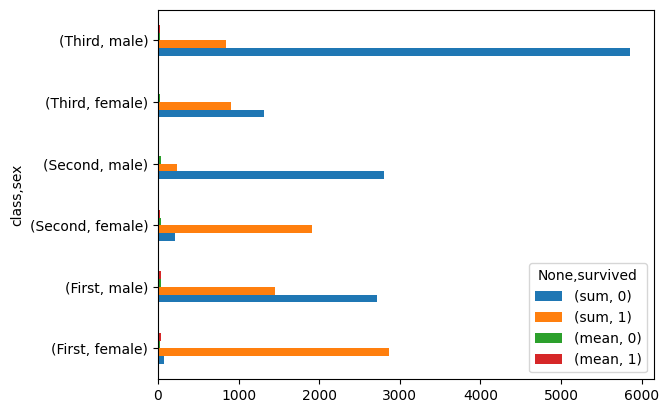

In [67]:
pv3.plot.barh()

In [69]:
pv3.loc[('First','male')]

      survived
sum   0           2719.500000
      1           1449.920000
mean  0             44.581967
      1             36.248000
Name: (First, male), dtype: float64

In [70]:
pv3.xs('male', level='sex')

sum                mean           
survived       0        1          0          1
class                                          
First     2719.5  1449.92  44.581967  36.248000
Second    2803.0   240.33  33.369048  16.022000
Third     5860.0   846.42  27.255814  22.274211

# fillna()
1. ()괄호 특정 문자열이나 숫자로 결측치를 채워주는 함수
2. 후 행의 값으로 대체한다. -> 'bfill' (backward)
3. 이전 행의 값으로 대체한다. -> 'ffill' (forward)
4. 데이터프레임['컬럼명'].fillna(method='bfill or ffill')

In [71]:
corona = pd.read_csv('../csv/corona.csv')
corona

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
815,815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
816,816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
817,817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
818,818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175


In [73]:
corona['accExamCnt'].fillna(method='bfill')

0      21518073.0
1      21518073.0
2      21518073.0
3      21518073.0
4      21518073.0
          ...    
815      261335.0
816      248647.0
817      234998.0
818      222395.0
819      210144.0
Name: accExamCnt, Length: 820, dtype: float64

In [74]:
corona['accExamCnt'].fillna(corona['accExamCnt'].mean())

0      7.545057e+06
1      7.545057e+06
2      7.545057e+06
3      7.545057e+06
4      7.545057e+06
           ...     
815    2.613350e+05
816    2.486470e+05
817    2.349980e+05
818    2.223950e+05
819    2.101440e+05
Name: accExamCnt, Length: 820, dtype: float64